In [1]:
%matplotlib inline
from model_v1 import *

## Pretraining - comp-o

##### Config

In [16]:
models = list(Path("../exp/train_unigram_1000_mono").glob("*"))
criterion = "validation/main/cer_ctc"
ascending = True
logfiles = sum([list(model.glob("**/*/log")) for model in models], [])

rgx = re.compile(
    r"\.\.\/exp\/train_(?P<target>\w+)_(?P<dataset>\w+)\/"
    r"(?P<model_name>\w+)_(?P<elayers>\d)_(?P<dlayers>\d)_(?P<units>\d+)_"
    r"(?P<alpha>(?:a\.\d+)|(?:ctc)|(?:att))"
    r"(?:_do(?P<dropout_enc>\.\d+)(?:(?P<dropout_dec>\.\d+))?)?(?:_wd(?P<weight_decay>\d+))?"
)

# list(map(rgx.search, map(str, models)))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

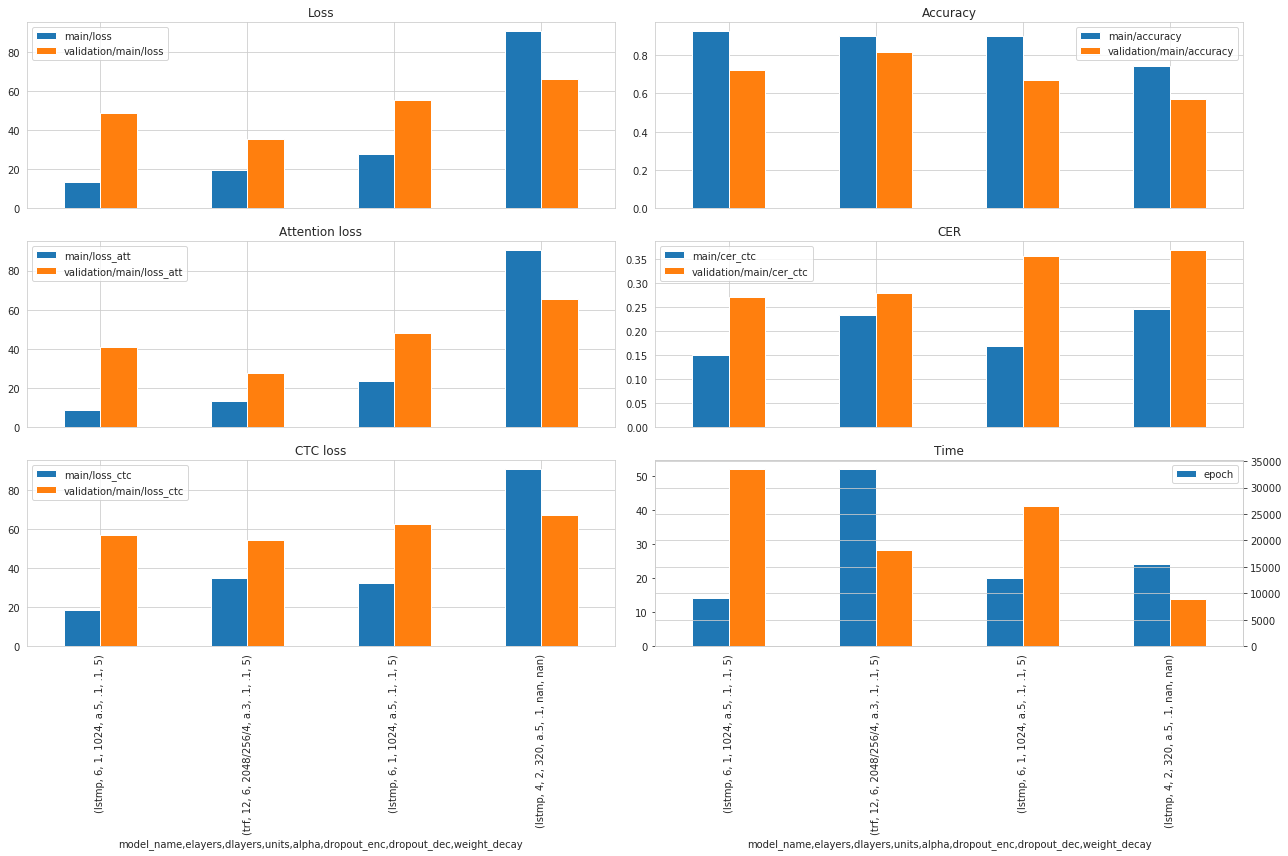

In [29]:
models = list(Path("../exp/train_unigram_1000_mono").glob("*"))
logfiles = sum([list(model.glob("**/*/log")) for model in models], [])
results = load_logs(*logfiles, parse_model=rgx)
plot_comparison(results[results["units"] != "1280"], list(rgx.groupindex), criterion=criterion, ascending=ascending, nbests=6)
for ax in plt.gcf().axes:
    if ax.get_title() in ("CTC loss", "Time"):
        labels = [tl.get_text() for tl in ax.get_xticklabels()]
        labels[1] = "(trf, 12, 6, 2048/256/4, a.3, .1, .1, 5)"
        ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig("../exp/graphs/comp_unigram_1000_mono.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

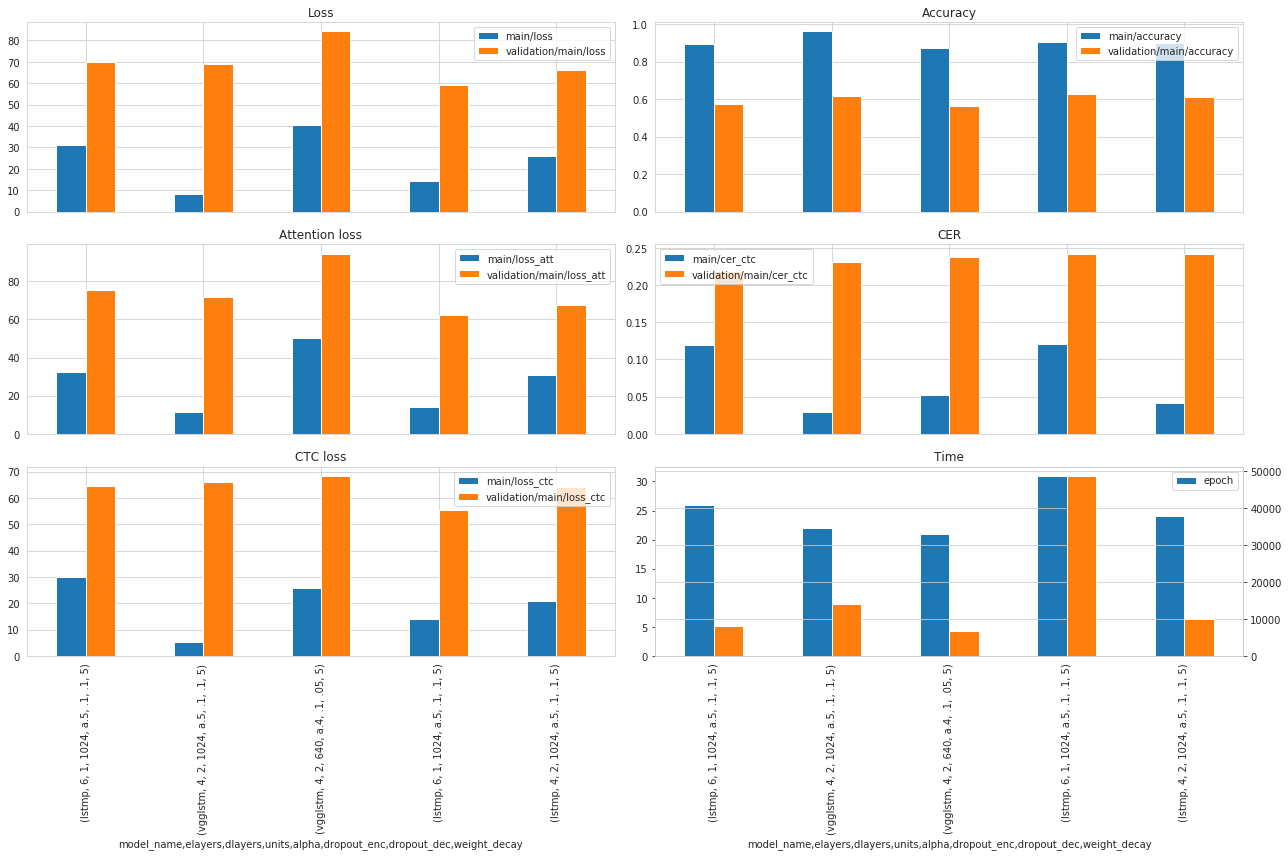

In [33]:
models = list(Path("../exp/train_unigram_1000_o").glob("*"))
logfiles = sum([list(model.glob("**/*/log")) for model in models], [])
results = load_logs(*logfiles, parse_model=rgx)
plot_comparison(results[results["units"] != "1280"], list(rgx.groupindex), criterion=criterion, ascending=ascending, nbests=5)
plt.tight_layout()
plt.savefig("../exp/graphs/comp_unigram_1000_o.eps")

# plot_training(results, nbests=5)
# plt.tight_layout()
# plt.savefig("../exp/graphs/train_vgglstm_lg_unigram_1000_o.png", dpi=300)

In [237]:
(results[results["units"] != "1280"].set_index(list(rgx.groupindex))
 .sort_values("validation/main/cer_ctc", ascending=True)
 .groupby("model_id").head(1)
 .head(10)
 .drop([
     "main/wer", "main/cer", "validation/main/wer", 
     "validation/main/cer", "eps", "epoch", 
     "model_id", "grad_norm", "elapsed_time"
 ], axis=1)
 .dropna(how='all', axis=1)
 .droplevel((0, 1)))

main/loss  \
model_name elayers dlayers units alpha dropout_enc dropout_dec weight_decay              
lstmp      6       1       1024  a.5   .1          .1          5               31.2555   
vgglstm    4       2       1024  a.5   .1          .1          5                8.3752   
                           640   a.4   .1          .05         5               40.4522   
lstmp      6       1       1024  a.5   .1          .1          5               14.2008   
           4       2       1024  a.5   .1          .1          5               25.8156   
vgglstm    4       2       1024  a.4   .1          .1          5               34.1144   
lstmp      6       1       512   a.5   .1          .1          5               57.5077   
vgglstm    4       2       1024  a.5   .2          .2          5               65.4613   
           6       3       256   a.4   .1          .1          5              127.9318   
           4       2       1024  a.5   .1          .1          4               45.5908   

                                                                             main/loss_ctc  \
model_name elayers dlayers units alpha dropout_enc dropout_dec weight_decay                  
lstmp      6       1       1024  a.5   .1          .1          5                   29.8400   
vgglstm    4       2       1024  a.5   .1          .1          5                    5.2802   
                           640   a.4   .1          .05         5                   25.8623   
lstmp      6       1       1024  a.5   .1          .1          5                   14.1967   
           4       2       1024  a.5   .1          .1          5                   20.9575   
vgglstm    4       2       1024  a.4   .1          .1          5                   28.1268   
lstmp      6       1       512   a.5   .1          .1          5                   53.1649   
vgglstm    4       2       1024  a.5   .2          .2          5                   41.9491   
           6       3       256   a.4   .1          .1          5                   56.4894   
           4       2       1024  a.5   .1          .1          4                   29.8927   

                                                                             main/loss_att  \
model_name elayers dlayers units alpha dropout_enc dropout_dec weight_decay                  
lstmp      6       1       1024  a.5   .1          .1          5                   32.6709   
vgglstm    4       2       1024  a.5   .1          .1          5                   11.4701   
                           640   a.4   .1          .05         5                   50.1788   
lstmp      6       1       1024  a.5   .1          .1          5                   14.2048   
           4       2       1024  a.5   .1          .1          5                   30.6737   
vgglstm    4       2       1024  a.4   .1          .1          5                   38.1061   
lstmp      6       1       512   a.5   .1          .1          5                   61.8504   
vgglstm    4       2       1024  a.5   .2          .2          5                   88.9735   
           6       3       256   a.4   .1          .1          5                  175.5600   
           4       2       1024  a.5   .1          .1          4                   61.2888   

                                                                             main/accuracy  \
model_name elayers dlayers units alpha dropout_enc dropout_dec weight_decay                  
lstmp      6       1       1024  a.5   .1          .1          5                    0.8934   
vgglstm    4       2       1024  a.5   .1          .1          5                    0.9612   
                           640   a.4   .1          .05         5                    0.8738   
lstmp      6       1       1024  a.5   .1          .1          5                    0.9035   
           4       2       1024  a.5   .1          .1          5                    0.9001   
vgglstm    4       2       1024  a.4   .1          .1          5                

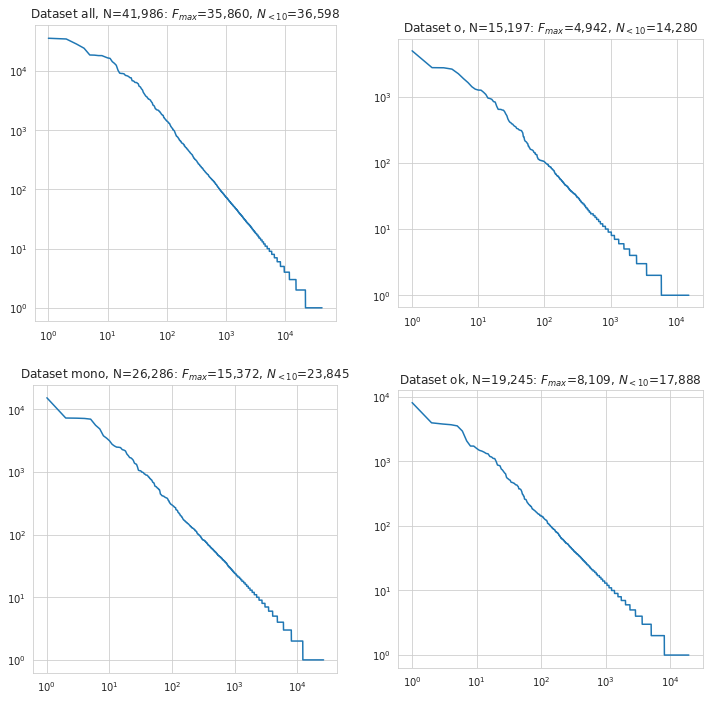

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
for i, wc in enumerate(Path("~/Downloads").expanduser().glob("word_dist.*")):
    tag = wc.suffix.replace(".", "")
    ar = np.loadtxt(wc)[:, 0]
    ar.sort()
    ax = axs[i % 2, i // 2]
    ax.loglog(np.arange(1, len(ar) + 1), ar[::-1])
    ax.set_title(f"Dataset {tag}, N={len(ar):,}: $F_{{max}}$={ar[-1]:,.0f}, $N_{{<10}}$={(ar < 10).sum():,.0f}")
    ax.set_aspect("equal")

plt.savefig("../exp/graphs/zipf_datasets.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


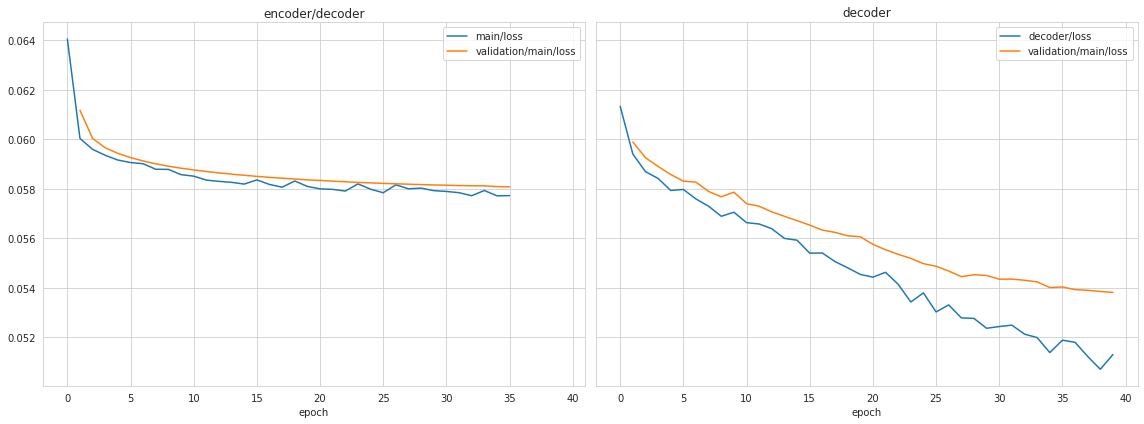

In [148]:
pretrained_model = "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5/train"
retrained_model = "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5_v2/dec-only"

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,6))
for i, (typ, model, ax) in enumerate(zip(["main", "decoder"], [pretrained_model, retrained_model], axs)):
    scores = load_logs(Path(model, "results/log")).groupby("epoch").mean()
    scores[[f"{typ}/loss", f"validation/main/loss"]].plot(ax=ax)
    ax.set_title("encoder/decoder" if typ == "main" else typ)
    
plt.tight_layout()
plt.savefig("../exp/graphs/hyp_pretrain_word_vectors.eps")

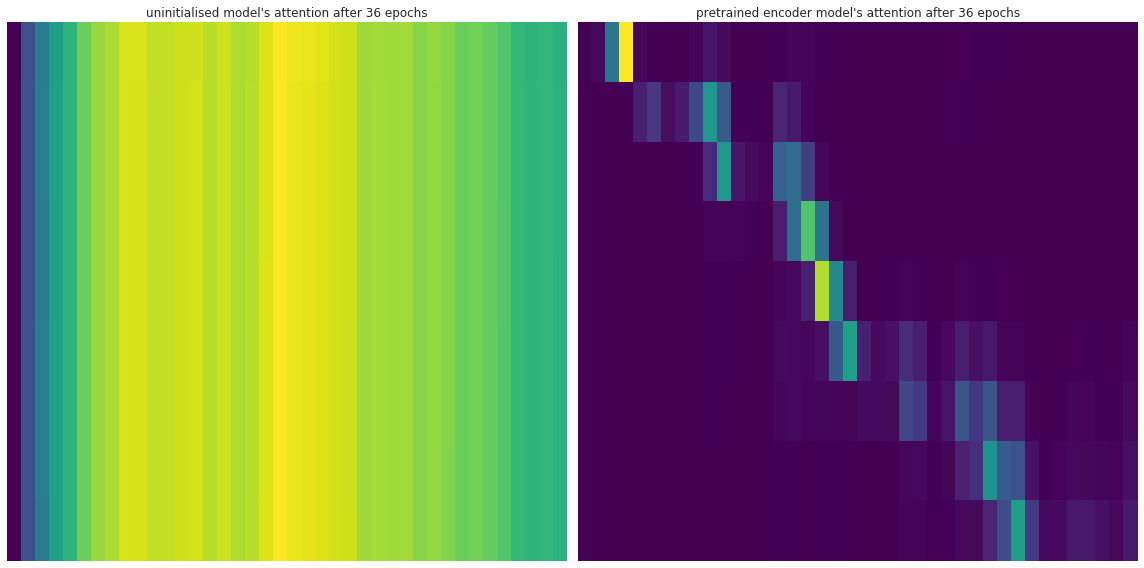

In [158]:
# finetuned_model = "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5/finetune_all"
model_names = ["uninitialised model", "pretrained encoder model"] #, "pretrained enc+dec model"
models = [pretrained_model, retrained_model] #finetuned_model
fig, axs = plt.subplots(1, 2, figsize=(16,8))
for i, (epoch, model, model_name, ax) in enumerate(zip([36, 36], models, model_names, axs)):
    att = np.load(Path(model, f"results/att_ws/V40001-fv400002.12.ep.{epoch}.npy"))[:,:40]
    sns.heatmap(att, cbar=False, xticklabels=[], yticklabels=[], cmap="viridis", ax=ax)
    ax.set_title(f"{model_name}'s attention after {epoch} epochs")
    
plt.tight_layout()
plt.savefig("../exp/graphs/hyp_pretrain_word_vectors_att.png", dpi=300)

In [171]:
def get_evaluation_results_v1(model_dir, test_sets=list("abfghijklmno")):
    # No curriculum
    results_json = "{model_dir}/evaluate/results.{test}.json"
    results = pd.DataFrame()
    for test_set in test_sets: 
        jsonfile =results_json.format(model_dir=model_dir, test=test_set)           
        if not Path(jsonfile).exists(): 
            print(f"{jsonfile} not found") 
            continue 

        with open(jsonfile) as f: 
            df = pd.DataFrame.from_dict(json.load(f)["utts"], orient="columns") 
            df["test_split"] = test_set 
            results = pd.concat([results, df], axis=0)

    return results

metrics = ["cer_ctc", "cer_dec", "ter_ctc", "ter_dec"]
eval_results = get_evaluation_results_v1("../exp/train_unigram_1000_mono/lstmp_6_1_1024_a.5_do.1.1_wd5")
test_scores = (eval_results[["test_split", *metrics]]
               .set_index(["test_split"])
               .stack(0).rename("score")
               .reset_index()
               .rename(columns={"level_1": "metric"})
               .groupby(["test_split", "metric"])
               .mean().unstack(level=0).T)

test_scores

metric            cer_ctc  cer_dec  ter_ctc  ter_dec
      test_split                                    
score a            0.8990   0.7072   1.0472   0.9189
      b            0.8806   0.6056   1.1187   0.8075
      f            0.7127   0.4902   0.8687   0.6264
      g            0.6185   0.5001   0.7686   0.6454
      h            0.7594   0.5625   0.9401   0.7424
      i            0.6993   0.4006   0.7963   0.4753
      j            0.5156   0.3445   0.6515   0.4386
      k            0.4708   0.3010   0.6061   0.3765
      l            0.4378   0.3000   0.5886   0.4043
      m            0.3519   0.2783   0.4984   0.3623
      n            0.6570   0.4951   0.8483   0.6483
      o            0.2405   0.2295   0.4019   0.3165

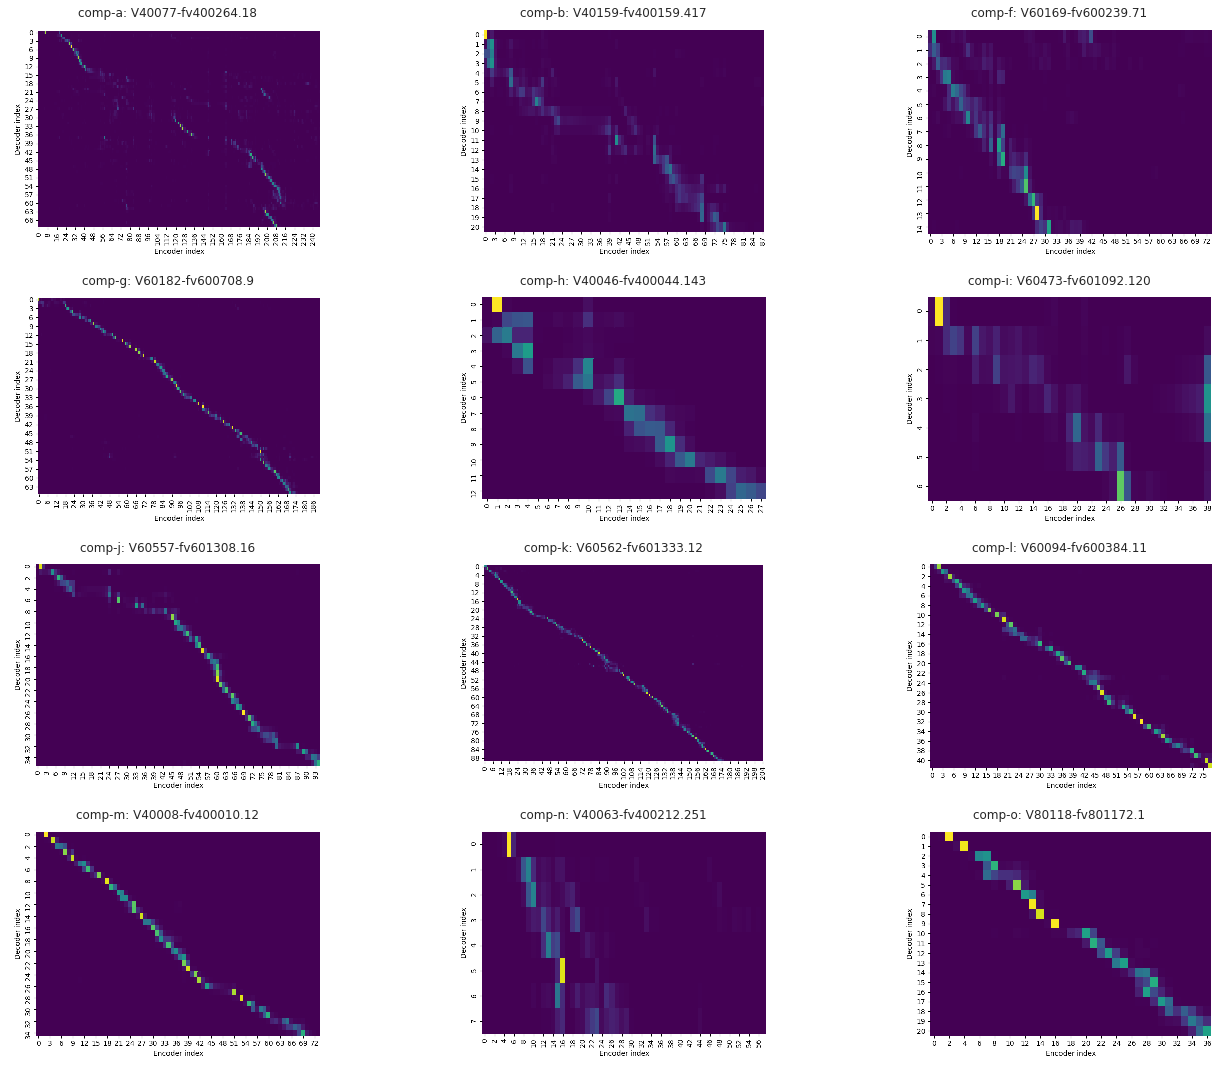

In [259]:
dataset_splits = pd.read_csv("../data/CGN_ALL/splits.csv", index_col="uttid", usecols=["uttid", "comp", "test"])

selection = (
    dataset_splits.loc[dataset_splits["test"], ["comp"]]
    .sample(frac=1.)
    .groupby("comp")
    .head(1)
    .reset_index()
    .set_index("comp")
    .sort_index()
)

att_dir = "../exp/train_unigram_1000_mono/lstmp_6_1_1024_a.5_do.1.1_wd5/evaluate/att_ws"
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
for i, (comp, (uttid,)) in enumerate(selection.iterrows()):
    att_file = Path(att_dir, f"{uttid}.png")
    ax = axs[i // 3, i % 3]
    ax.imshow(plt.imread(str(att_file)))
    ax.set_title(f"{comp}: {uttid}")
    ax.set_axis_off()
    
plt.tight_layout()

## Word Vectors

In [178]:
def get_evaluation_results_v3(model_dir, test_sets=list("abfghijklmno")):
    # Word vectors
    results_json = "{model_dir}/evaluate/{test}/results/results.json"
    results = pd.DataFrame()
    for test_set in test_sets: 
        jsonfile =results_json.format(model_dir=model_dir, test=test_set)           
        if not Path(jsonfile).exists(): 
            print(f"{jsonfile} not found") 
            continue 

        with open(jsonfile) as f:
            df = pd.DataFrame.from_dict(json.load(f)["results"], orient="index") 
            df["test_split"] = test_set 
            results = pd.concat([results, df], axis=0)

    return results

model_dir = "../exp/train_word_vectors_mono/lstmp_6_1_1024_a.5_do.1.1_wd5/finetune_all"
eval_results = get_evaluation_results_v3(model_dir)
eval_results.groupby("test_split").mean()



,accuracy,loss,wer
test_split,,,
a,0.1694,0.0465,0.8271
b,0.3246,0.0383,0.6656
f,0.2654,0.0444,0.7273
g,0.2741,0.0456,0.7203
h,0.2913,0.0447,0.6999
i,0.2104,0.0487,0.7823
j,0.2984,0.0450,0.6947
k,0.2866,0.0510,0.7061
l,0.3345,0.0458,0.6574


component a
eigenlijk is een beroeps is dat uhm
ja gewillen een gedragskaart is dat

component b
denk je dat een leerkracht z'n taal werkelijk moet moet aanpassen aan die leerlingen of niet
wel gewillen misschiem misschiem boemvol meetste vluchtigs als gedragskaart denk risicootje dat verkwansel vluchtigs lurkende vluchtigs

component f
dit is geen bedrij bedrijfsbezoek natuurlijk hé
doemme is misschiem cultuurfreak natuurlijk tegenslaan nee

component g
dat alles te veel vanuit instellingen daarmee bedoel ik rusthuizen en dergelijke bekeek
dat alles te veel van diepergaand vluchtigs gewillen gewillen lodderogen ethiopiers onderhoudssubsidie hetzelfs

component h
we keren terug naar de achttiende eeuw voor christus
waarschij deurwacht lurkende beliefden aso-leerlingen toptwintig deftigere wauwelde wauwelde

component i
eerste kilometer is bijna afgelegd
eerste toptwintig is boemvol vuilnismand

component j
op de eerste dag van het proces in pretoria wordt de zitting uitgesteld
op de ee

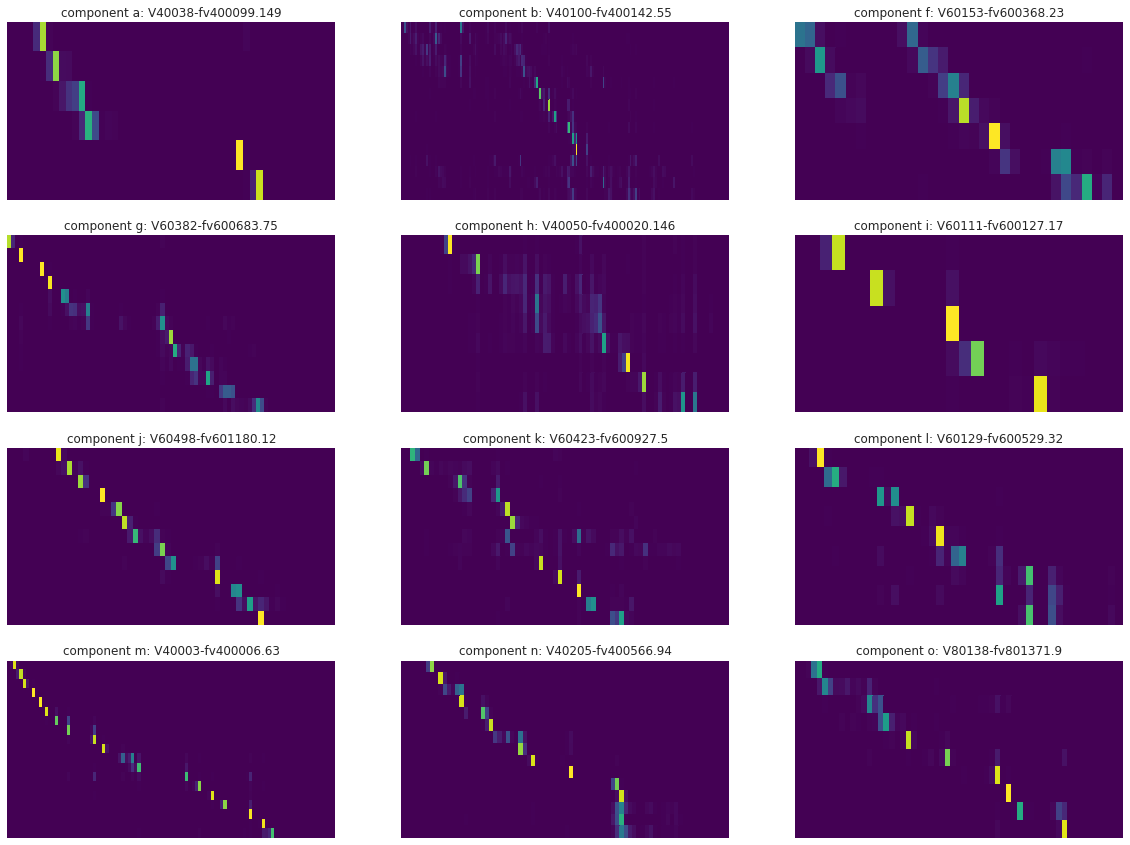

In [263]:
batch_index = 12
annots = pd.read_csv("../data/CGN_ALL/annotations.csv", index_col="uttid")
fig, axs = plt.subplots(4, 3, figsize=(20,15))
for i, dump_dir in enumerate(sorted(Path(f"{model_dir}/evaluate").glob("?/"))):
    att_file, = np.random.choice(list(dump_dir.glob("results/dump/attn_ws.*.npy")), 1)
    uttid = np.load(str(att_file).replace("attn_ws", "uttids"))[batch_index]
    prediction_str = eval_results.loc[uttid, "prediction_str"]
    sentence = annots.loc[uttid].text
    ylen = len(prediction_str.split())
    att = np.load(att_file)[batch_index, :ylen, :]    
    ax = axs[i // 3, i % 3]
    sns.heatmap(att, cbar=False, xticklabels=[], yticklabels=[], cmap="viridis", ax=ax)
    ax.set_title(f"component {dump_dir.name}: {uttid}")
    print(f"component {dump_dir.name}")
    print(f"{sentence}")
    print(f"{prediction_str}")
    print()

# plt.tight_layout()
# plt.savefig("../exp/graphs/attentions_test_word_vectors_mono_lstmp_6_1_1024_a.5_do.1.1_wd5.png", dpi=300)

In [179]:
def get_evaluation_results_v3(model_dir, test_sets=list("abfghijklmno")):
    # Word vectors
    results_json = "{model_dir}/evaluate/{test}/results/results.json"
    results = pd.DataFrame()
    for test_set in test_sets: 
        jsonfile =results_json.format(model_dir=model_dir, test=test_set)           
        if not Path(jsonfile).exists(): 
            print(f"{jsonfile} not found") 
            continue 

        with open(jsonfile) as f:
            df = pd.DataFrame.from_dict(json.load(f)["results"], orient="index") 
            df["test_split"] = test_set 
            results = pd.concat([results, df], axis=0)

    return results

model_dir = "../exp/train_word_vectors_all/lstmp_6_1_1024_a.5_do.1.1_wd5/retrain"
eval_results = get_evaluation_results_v3(model_dir)
eval_results.groupby("test_split").mean()

,accuracy,loss,wer
test_split,,,
a,0.1687,0.0460,0.8279
b,0.3273,0.0377,0.6648
f,0.2575,0.0440,0.7363
g,0.2644,0.0456,0.7293
h,0.2854,0.0442,0.7081
i,0.1974,0.0490,0.7958
j,0.2955,0.0450,0.6988
k,0.2678,0.0517,0.7230
l,0.3304,0.0459,0.6631


In [218]:
print(eval_results.groupby("test_split").mean().to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  accuracy &   loss &    wer \\
test\_split &           &        &        \\
\midrule
a          &    0.1687 & 0.0460 & 0.8279 \\
b          &    0.3273 & 0.0377 & 0.6648 \\
f          &    0.2575 & 0.0440 & 0.7363 \\
g          &    0.2644 & 0.0456 & 0.7293 \\
h          &    0.2854 & 0.0442 & 0.7081 \\
i          &    0.1974 & 0.0490 & 0.7958 \\
j          &    0.2955 & 0.0450 & 0.6988 \\
k          &    0.2678 & 0.0517 & 0.7230 \\
l          &    0.3304 & 0.0459 & 0.6631 \\
m          &    0.3181 & 0.0442 & 0.6649 \\
n          &    0.2651 & 0.0445 & 0.7292 \\
o          &    0.3686 & 0.0429 & 0.6230 \\
\bottomrule
\end{tabular}



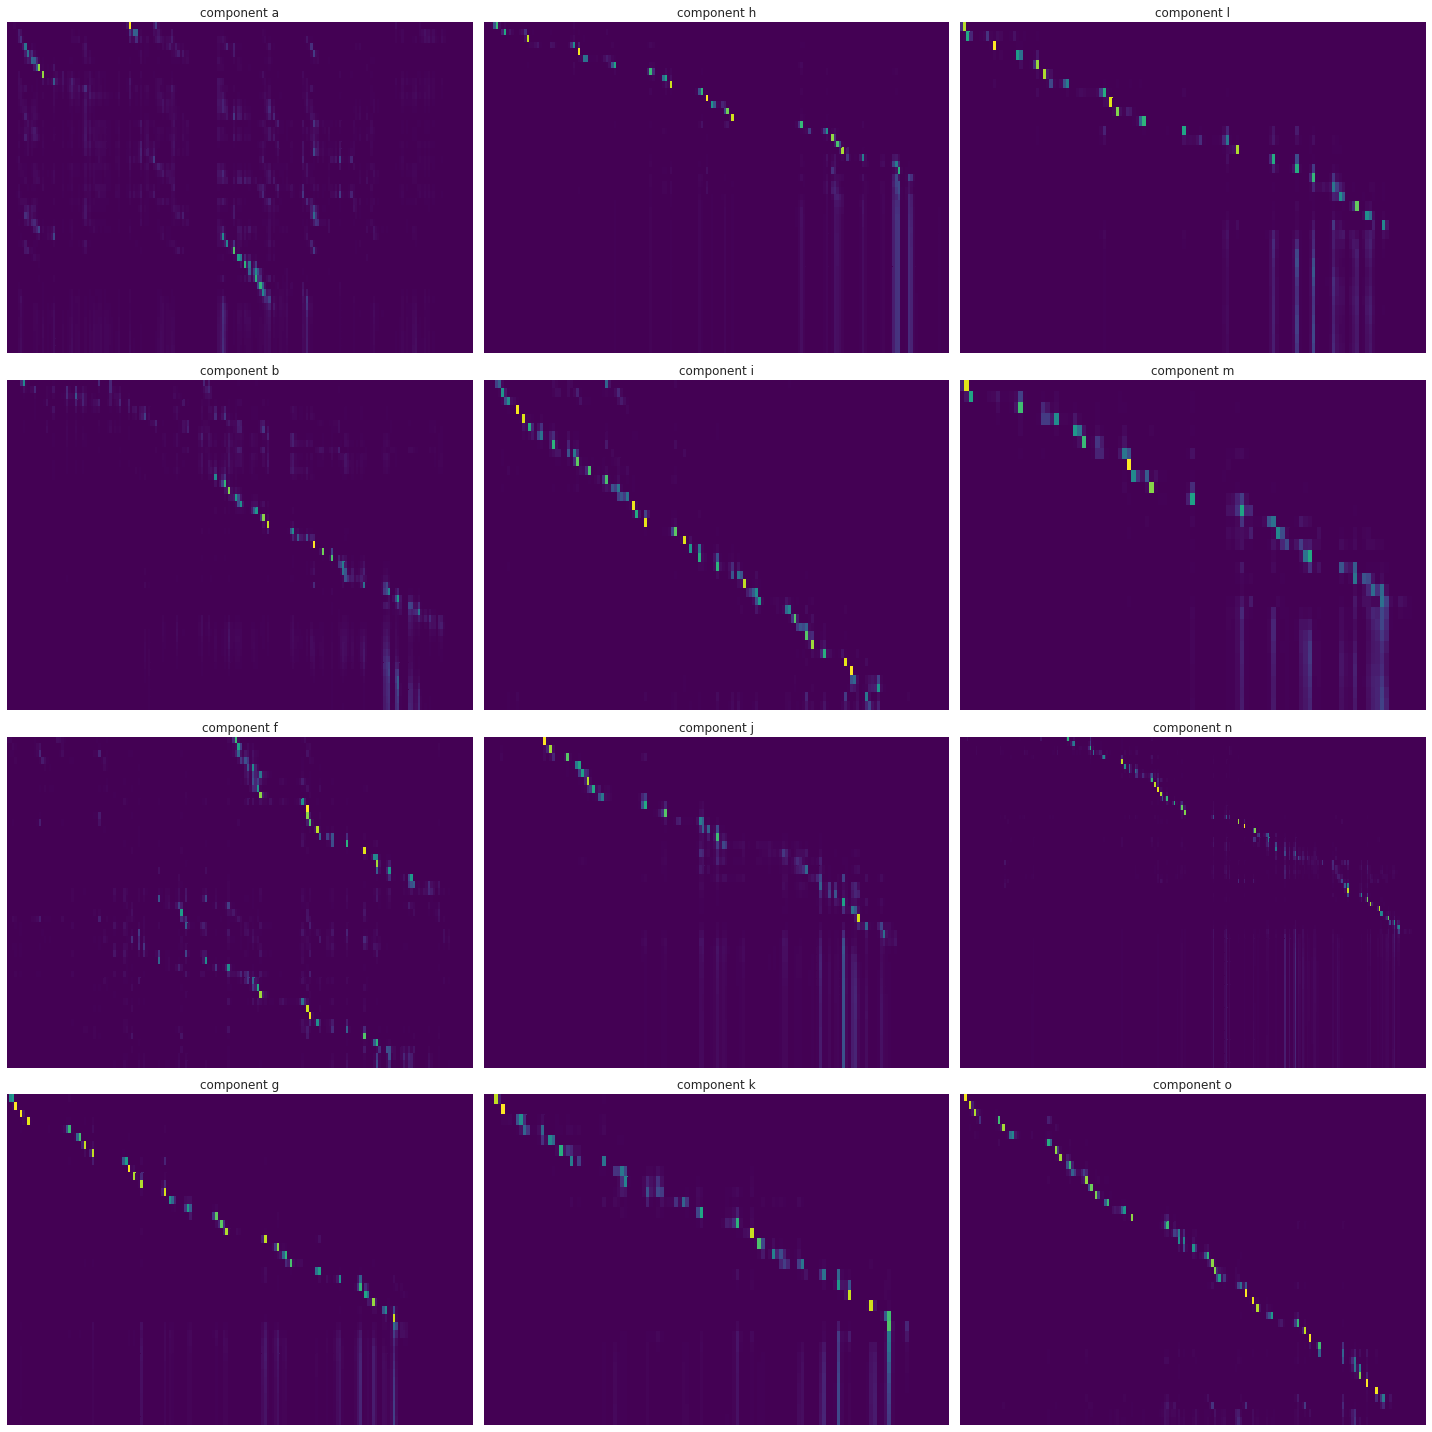

In [219]:
fig, axs = plt.subplots(4, 3, figsize=(20,20))
model = "../exp/train_word_vectors_all/lstmp_6_1_1024_a.5_do.1.1_wd5/retrain/evaluate"
for i, subset in enumerate(sorted(Path(model).glob("?"))):
    attn_ws = np.load(Path(subset, "results/dump/attn_ws.0001.npy"))[5]
    ax = axs[i % 4, i // 4]
    sns.heatmap(attn_ws, xticklabels=False, yticklabels=False, cbar=False, cmap="viridis", ax=ax)
    ax.set_title(f"component {subset.name}")
plt.tight_layout()

## Pretraining - curriculum

o: 91 results
ok: 37 results
mono: 256 results
all: 348 results
Model was not evaluated?
Model was not evaluated?


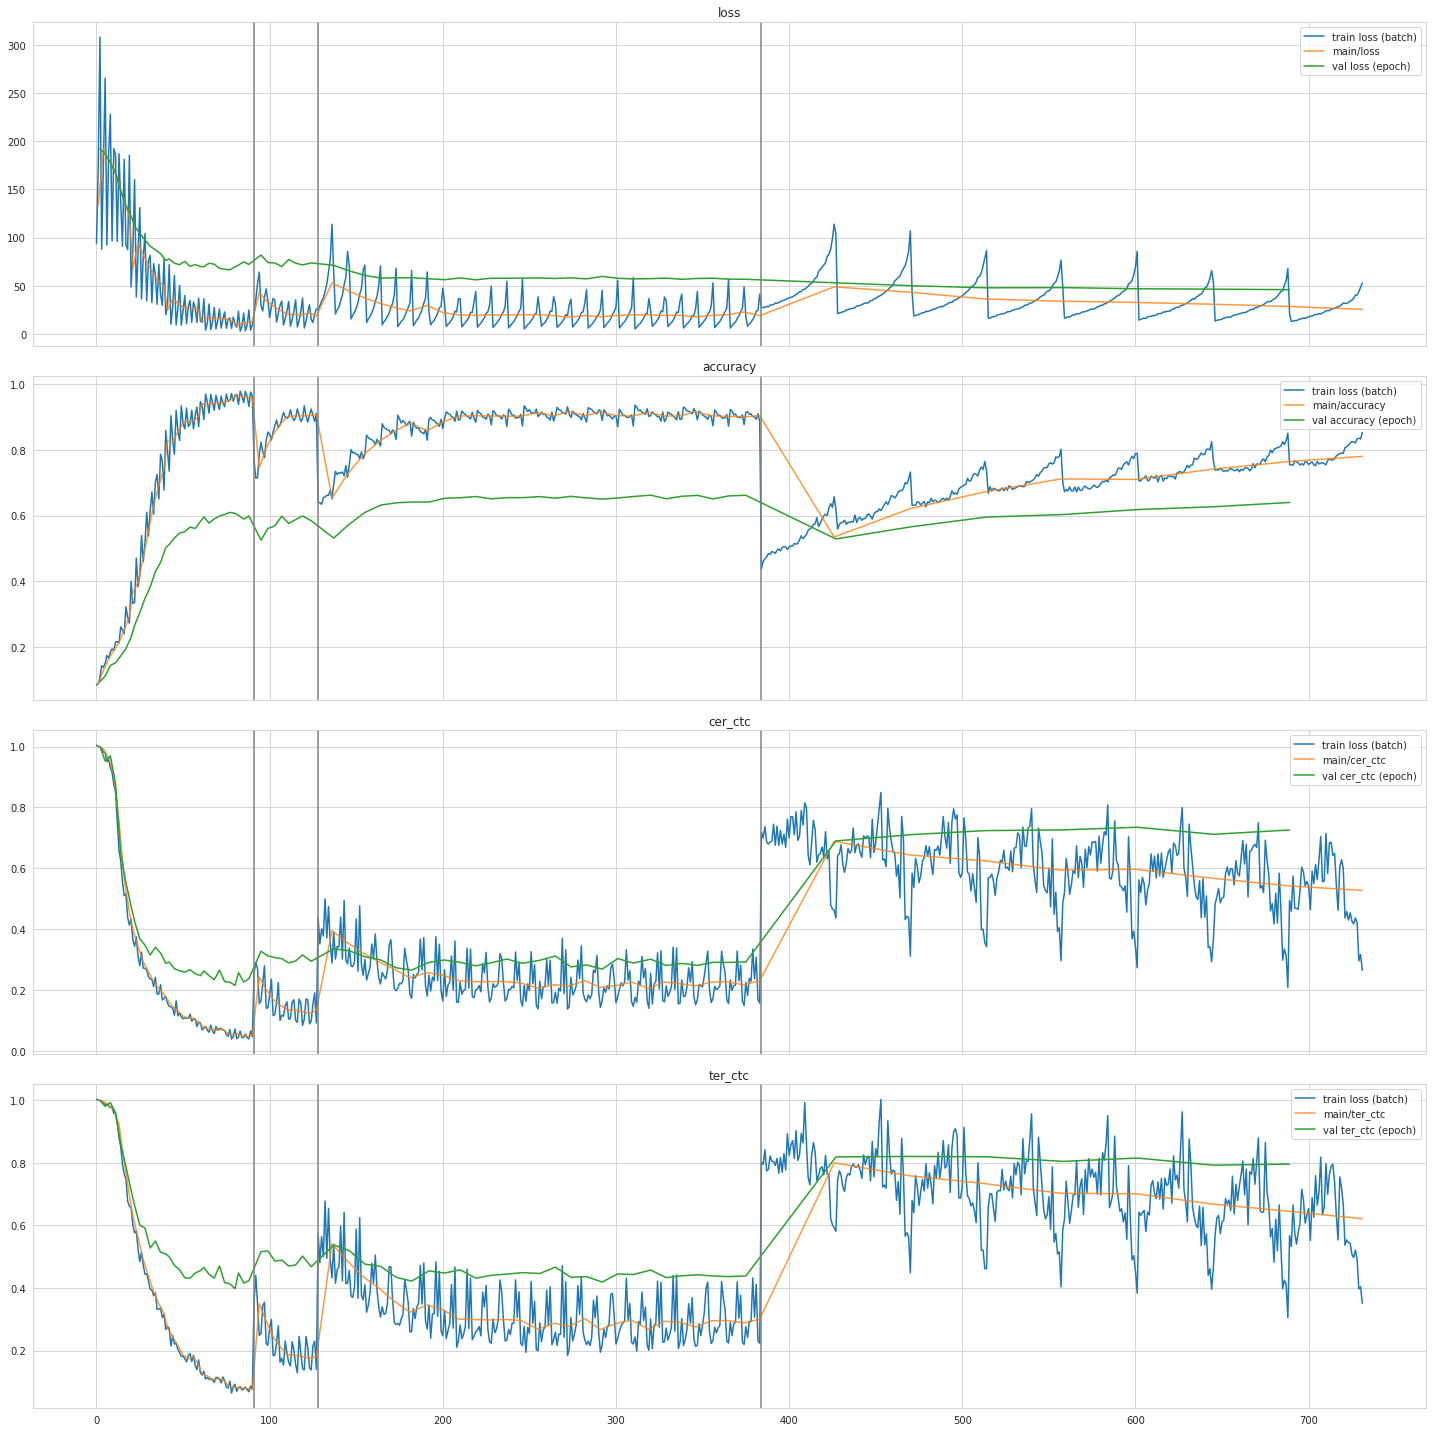

In [20]:
model_dir = "../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5"
nrows, ncols = 4, 1
_, axs = plt.subplots(nrows, ncols, figsize=(20,20), sharex=True)
summary = ModelSummary(model_dir, curriculum=True, evaluation=False)
for i, metric in enumerate(["loss", "accuracy", "cer_ctc", "ter_ctc"]):
    ax = axs[i // nrows, i % nrows] if (nrows > 1 and ncols > 1) else axs[i]
    summary.training_summary(metric=metric, ax=ax)
    ax.set_title(metric); ax.set_xlabel("")
plt.tight_layout()

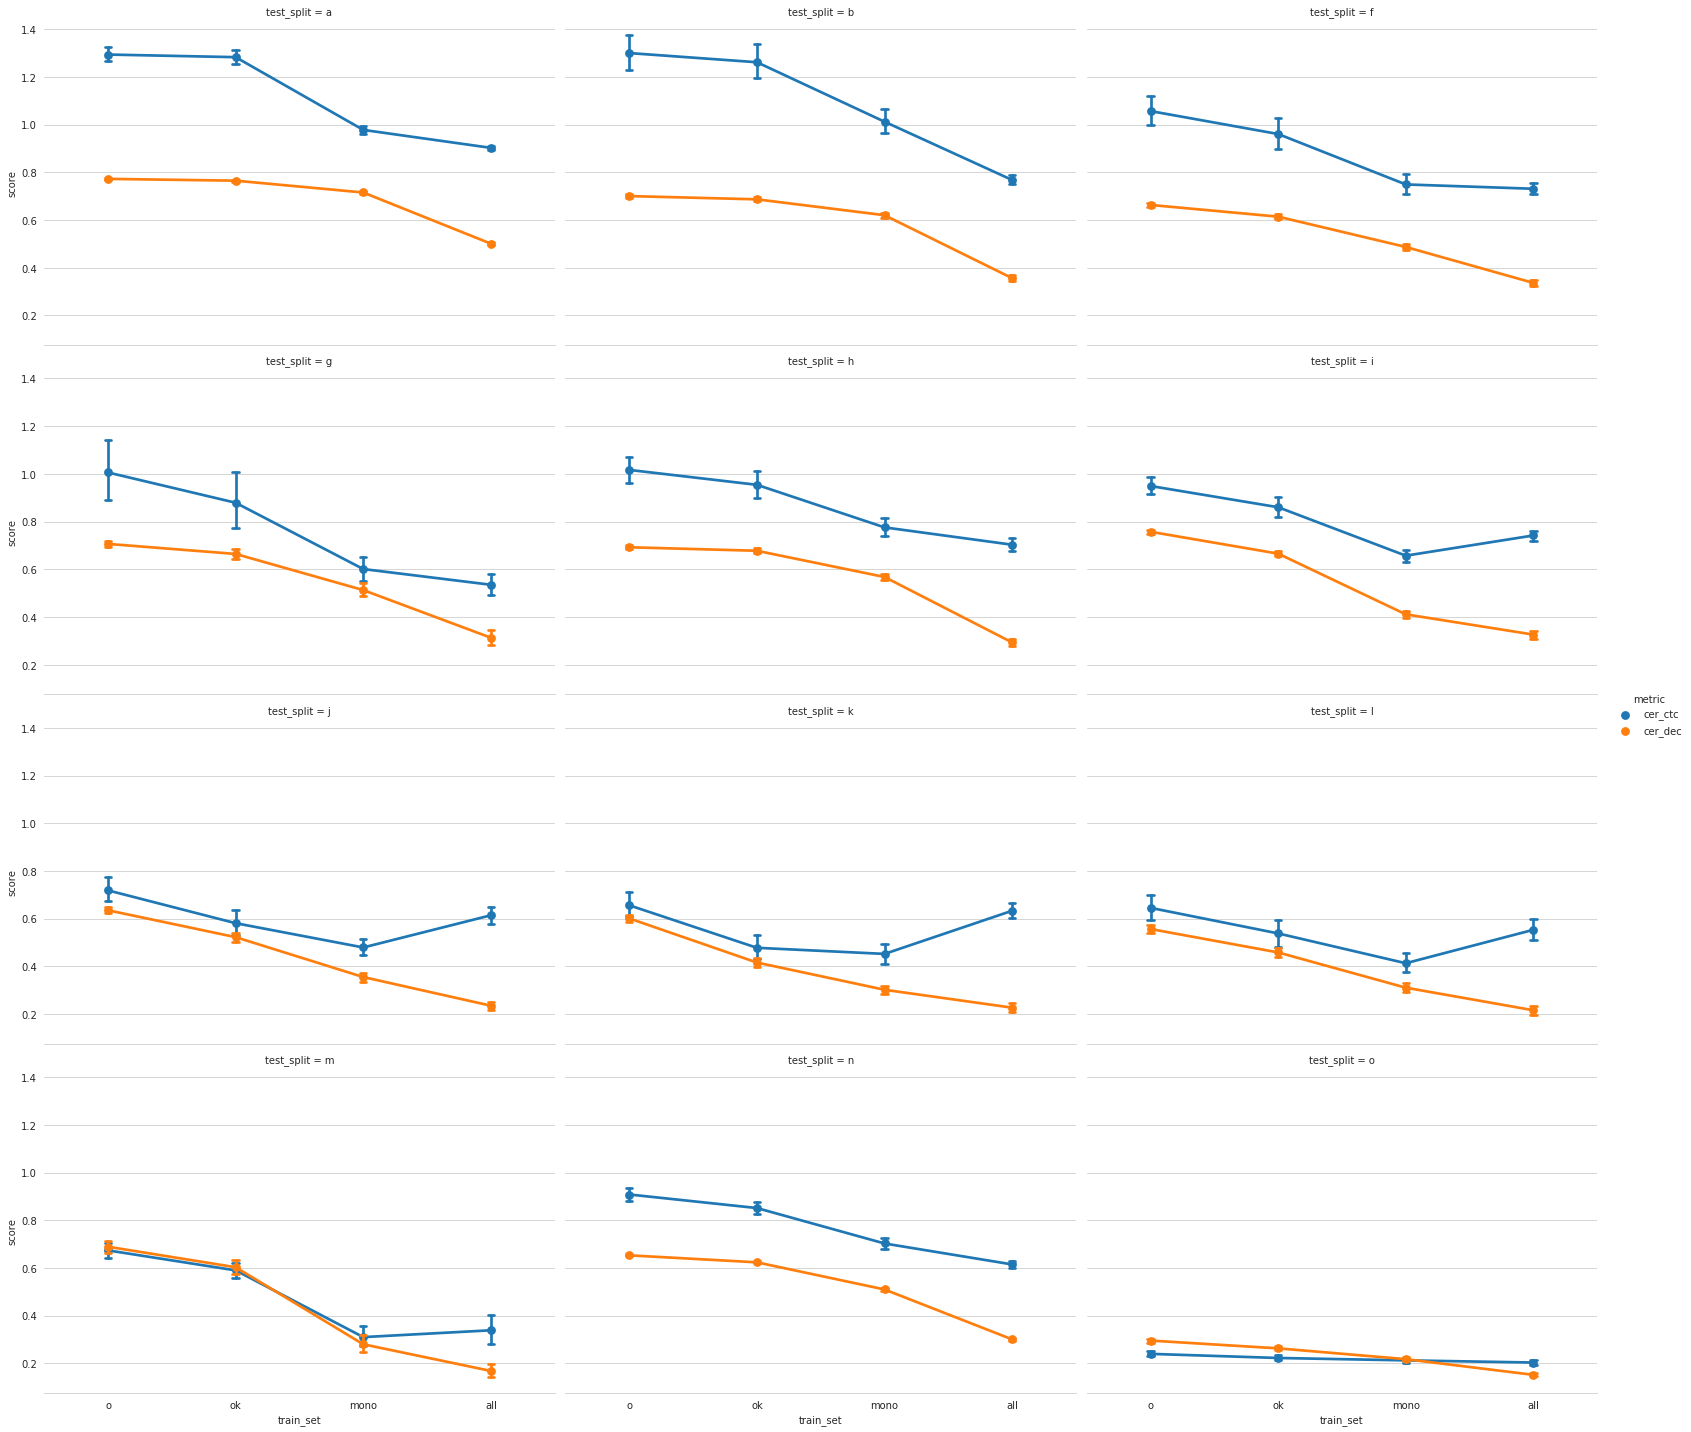

In [37]:
model_dir = "../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5"
eval_results = get_evaluation_results(model_dir)

metrics = ["cer_ctc", "cer_dec"]  #, "ter_ctc", "ter_dec"]
train_sets = ["o", "ok", "mono", "all"]
test_split = list("abfghijklmno")

# fig, axs = plt.subplots(4, 3, figsize=(20,20))
# for i, test_set in enumerate(eval_results.test_split.unique()):
#     sel = test_scores.loc[test_scores.test_split == test_set]
#     sns.boxplot(x="train_set", y="score", hue="metric", data=test_scores, ax=axs[i%3, i//3])
#     break

sns.catplot(x="train_set", y="score", hue="metric", col="test_split", data=(
    eval_results.assign(train_set=pd.Categorical(eval_results["train_set"], train_sets))
    .loc[(eval_results.train_set.isin(train_sets) & eval_results.test_split.isin(test_split)), 
         ["train_set", "test_split", *metrics]]
    .set_index(["train_set", "test_split"])
    .swaplevel(0, 1, axis=0)
    .stack(level=0)
    .reset_index()
    .rename(columns={"level_2": "metric", 0: "score"})
), col_wrap=3, kind="point", capsize=.05, aspect=1.5).despine(left=True);

# plt.savefig(f"{model_dir}/test_scores.png", dpi=800)

# (eval_results[["train_set", "test_split", *metrics]]
#  .assign(train_set=pd.Categorical(eval_results["train_set"], train_sets)))

In [35]:
test_scores = (eval_results[["train_set", "test_split", *metrics]]
               .assign(train_set=pd.Categorical(eval_results["train_set"], train_sets))
               .set_index(["train_set", "test_split"])
               .stack(0).rename("score")
               .reset_index()
               .rename(columns={"level_2": "metric"})
               .groupby(["train_set", "test_split", "metric"])
               .mean().unstack(level=1))

# test_scores.pivot(columns="metric", values="score", index=["train_set", "test_split"])
test_scores

score                                                   \
test_split             a      b      f      g      h      i      j      k   
train_set metric                                                            
o         cer_ctc 1.2935 1.2997 1.0566 1.0059 1.0167 0.9493 0.7185 0.6560   
          cer_dec 0.7724 0.7002 0.6631 0.7065 0.6925 0.7575 0.6351 0.6009   
          ter_ctc 1.8759 1.8774 1.5931 1.6144 1.6251 1.4928 1.1609 1.0410   
          ter_dec 1.0459 0.9816 0.9119 0.9740 0.9733 1.0205 0.8716 0.8136   
ok        cer_ctc 1.2825 1.2613 0.9603 0.8791 0.9542 0.8602 0.5810 0.4778   
          cer_dec 0.7648 0.6866 0.6140 0.6644 0.6778 0.6657 0.5224 0.4160   
          ter_ctc 1.7822 1.7437 1.3401 1.3252 1.4298 1.2308 0.8863 0.7220   
          ter_dec 1.0181 0.9425 0.8100 0.8717 0.9184 0.8764 0.6924 0.5410   
mono      cer_ctc 0.9777 1.0120 0.7490 0.6011 0.7758 0.6572 0.4792 0.4522   
          cer_dec 0.7153 0.6201 0.4869 0.5130 0.5679 0.4113 0.3552 0.3019   
          ter_ctc 1.2206 1.3295 0.9474 0.8227 1.0347 0.8074 0.6504 0.6121   
          ter_dec 0.9415 0.8352 0.6297 0.6757 0.7580 0.5021 0.4560 0.3862   
all       cer_ctc 0.9024 0.7677 0.7309 0.5353 0.7031 0.7419 0.6141 0.6331   
          cer_dec 0.5007 0.3561 0.3363 0.3133 0.2935 0.3264 0.2352 0.2269   
          ter_ctc 0.9466 0.8270 0.7970 0.6244 0.7803 0.8058 0.6856 0.7047   
          ter_dec 0.6098 0.4231 0.4139 0.3896 0.3681 0.3885 0.3008 0.2828   

                                               
test_split             l      m      n      o  
train_set metric                               
o         cer_ctc 0.6453 0.6737 0.9080 0.2400  
          cer_dec 0.5565 0.6890 0.6530 0.2957  
          ter_ctc 1.0441 0.9691 1.4014 0.4316  
          ter_dec 0.7711 0.9168 0.8985 0.4067  
ok        cer_ctc 0.5381 0.5899 0.8512 0.2227  
          cer_dec 0.4583 0.6030 0.6237 0.2631  
          ter_ctc 0.8308 0.8356 1.2548 0.3985  
          ter_dec 0.6203 0.8162 0.8400 0.3609  
mono      cer_ctc 0.4131 0.3102 0.7026 0.2127  
          cer_dec 0.3106 0.2801 0.5099 0.2178  
          ter_ctc 0.5770 0.4568 0.9493 0.3665  
          ter_dec 0.4131 0.3681 0.6741 0.3009  
all       cer_ctc 0.5533 0.3388 0.6149 0.2036  
          cer_dec 0.2160 0.1684 0.3007 0.1520  
          ter_ctc 0.6379 0.4363 0.7206 0.3283  
          ter_dec 0.2819 0.2190 0.3863 0.2135

### Small models (Apr 2020)

### vanilla

- started: 04/17 12:19:17
- config: conf/train_ep1000_es5.yaml
- batch size: 64
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: none

o: 91 results
ok: 37 results
mono: 256 results
all: 960 results
Model was not evaluated?
Model was not evaluated?


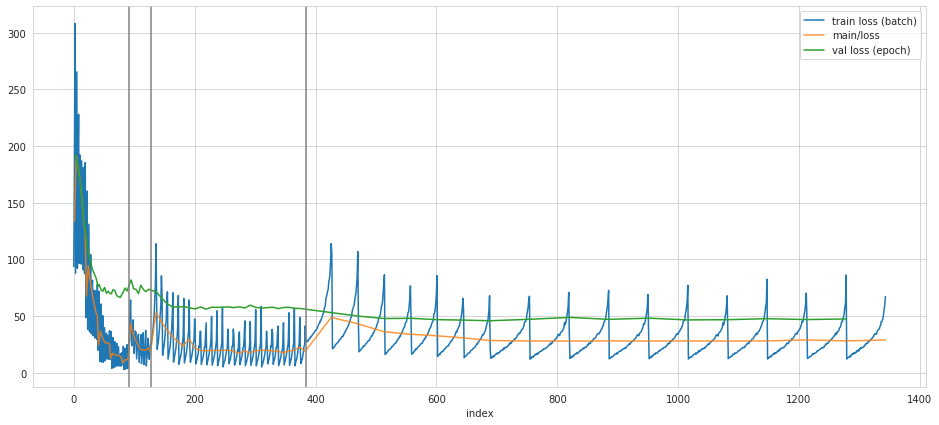

In [15]:
summary = ModelSummary("../exp/train_unigram_1000_curriculum/lstmp_6_1_1024_a.5_do.1.1_wd5")
summary.training_summary()

In [16]:
summary.evaluation_summary()

### fast

- started: 04/21 09:12:04
- config: conf/train_ep1000_es5_fast.yaml
- batch size: 256
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: none

Model was not evaluated?
Model was not evaluated?


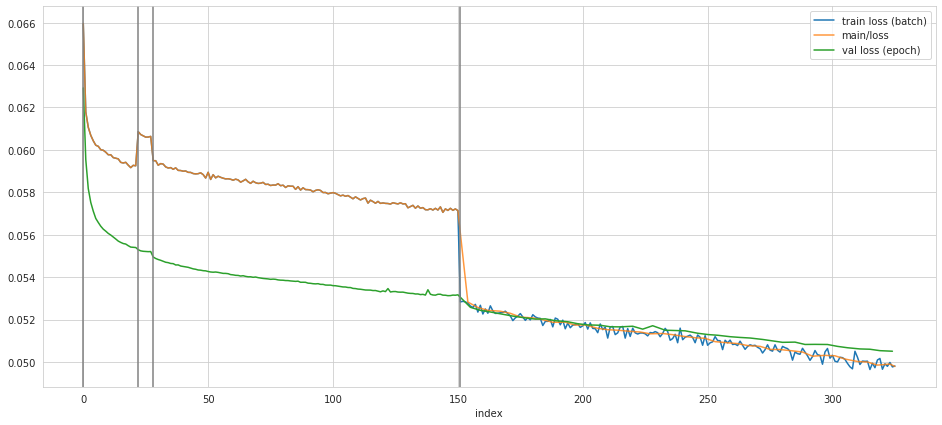

In [6]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/v2")
summary.training_summary()

### sorted

- started: 04/20 11:55:42
- config: conf/train_ep1000_es5_sorted.yaml
- batch size: 128
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: -1
- preprocess: none

In [40]:
# summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/sorted")
# summary.training_summary()

,accuracy,wer,loss
dataset,,,
a,0.0908,0.9084,0.0491
b,0.1555,0.8412,0.0440
f,0.1172,0.8803,0.0494
g,0.1262,0.8732,0.0517
h,0.1161,0.8819,0.0508
i,0.0814,0.9169,0.0541
j,0.1395,0.8583,0.0515
k,0.1376,0.8615,0.0584
l,0.1502,0.8477,0.0534


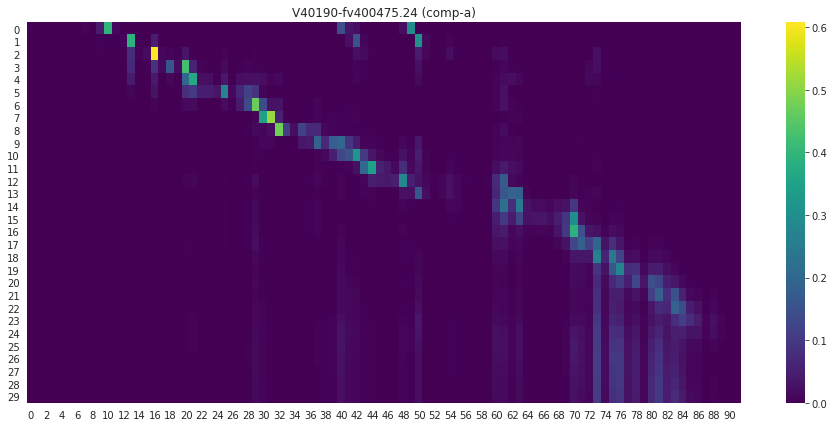

In [8]:
summary.evaluation_summary()

### SpecAugment

- started: 04/21 09:12:04
- config: conf/train_ep1000_es5_sorted.yaml
- batch size: 128
- epoch: 1000
- early stop: yes
- patience: 5
- sortagrad: 0
- preprocess: conf/specaug.yaml

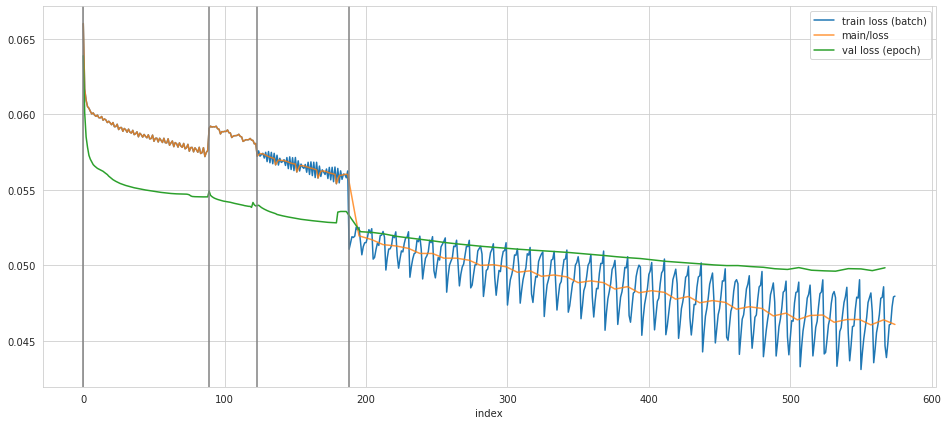

In [9]:
summary = ModelSummary("../exp/train_lstm_words_pretrained_curriculum/specaug")
summary.training_summary()

,accuracy,wer,loss
dataset,,,
a,0.0837,0.9155,0.0492
b,0.1464,0.8506,0.0443
f,0.1025,0.8949,0.0498
g,0.1165,0.8832,0.0520
h,0.1033,0.8951,0.0512
i,0.0737,0.9258,0.0545
j,0.1251,0.8729,0.0520
k,0.1242,0.8742,0.0589
l,0.1354,0.8627,0.0538


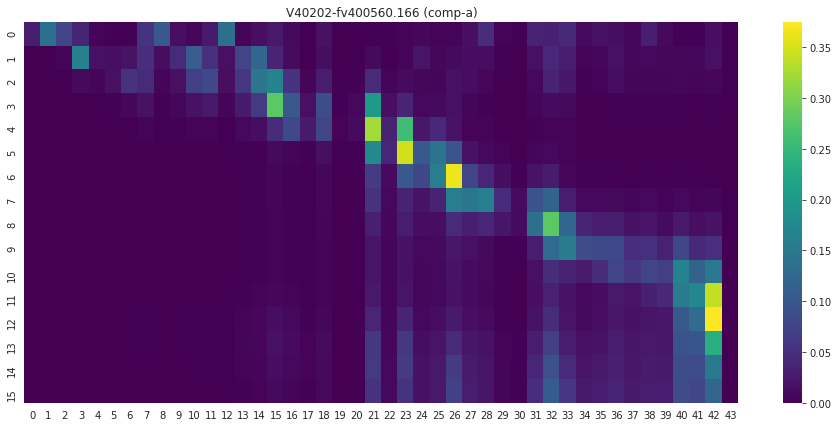

In [9]:
summary.evaluation_summary()

## Evaluation

In [186]:
def load_batch(batch_nr):
    result_dir = Path(model_dir, "evaluate", "results")
    output_files = list(result_dir.glob("*.npy"))
    
    attn_weights = np.load(list(filter(lambda p: p.stem == f"att_weights_batch{i}", output_files))[0])
    ids = np.load(list(filter(lambda p: p.stem == f"id_batch{i}", output_files))[0])
    targets = np.load(list(filter(lambda p: p.stem == f"target_batch{i}", output_files))[0])
    target_lengths = np.load(list(filter(lambda p: p.stem == f"target_lengths{i}", output_files))[0])
    preds = np.load(list(filter(lambda p: p.stem == f"predictions_batch{i}", output_files))[0])

    return {
        "attention": attn_weights,
        "uttids": ids,
        "targets": targets,
        "target_lengths": target_lengths,
        "predictions": preds
    }

def score(y_pred, y_true, ylen):
    return ((y_pred[:ylen] - y_true[:ylen]) ** 2).mean()

def batch_scores(batch):
    return np.array([score(
        batch["predictions"][i], 
        batch["targets"][i],
        batch["target_lengths"][i]
    ) for i in range(len(batch["predictions"]))])


In [1]:
# with open("../dump/CGN_test/deltafalse/data_words.all.json") as f:
#     test_set = json.load(f)["utts"]
    
# batch = load_batch(0)

In [2]:
# batch_scores(batch)

In [3]:
# batch["targets"][-1].shape, batch["predictions"][-1].shape

In [4]:
# i = -1
# sns.heatmap(batch["attention"][i][:batch["target_lengths"][i]], cmap="Blues");

In [190]:
def Embedding(num_embeddings, embedding_dim, eos_idx, eos_value=0):
    m = nn.Embedding(num_embeddings, embedding_dim)
    nn.init.uniform_(m.weight, -0.1, 0.1)
    nn.init.constant_(m.weight[eos_idx], eos_value)
    return m


def load_pretrained_embedding_from_file(embed_path, vocab, freeze=True, eos_idx=-1, eos_value=0):
    vocab = vocab.copy()
    num_embeddings = len(vocab)
    # eos_idx MUST be -1 (= the last one) otherwise, we will have a clash with the other indices
    # Note: can be easily solved in load_embedding, but does not matter a.t.m.
    assert eos_idx == -1 or eos_idx == num_embeddings - 1
    embed_dict = parse_embedding(embed_path)
    embed_dim = embed_dict[list(embed_dict)[0]].size(0)
    embed_tokens = Embedding(num_embeddings, embed_dim, eos_idx, eos_value)
    embed_tokens.weight.requires_grad = not freeze
    return load_embedding(embed_dict, vocab, embed_tokens)


def load_embedding(embed_dict, vocab, embedding):
    """[From fairseq]"""
    for idx in range(len(vocab)):
        token = vocab[idx]
        if token in embed_dict:
            embedding.weight.data[idx] = embed_dict[token]
    return embedding


def parse_embedding(embed_path):
    """[From fairseq] Parse embedding text file into a dictionary of word and embedding tensors.
    The first line can have vocabulary size and dimension. The following lines
    should contain word and embedding separated by spaces.
    Example:
        2 5
        the -0.0230 -0.0264  0.0287  0.0171  0.1403
        at -0.0395 -0.1286  0.0275  0.0254 -0.0932
    """
    embed_dict = {}
    with open(embed_path, encoding='utf-8') as f_embed:
        next(f_embed)  # skip header
        for line in f_embed:
            pieces = line.rstrip().split(" ")
            embed_dict[pieces[0]] = torch.Tensor(
                [float(weight) for weight in pieces[1:]]
            )
    return embed_dict

In [5]:
# with open(Path(model_dir, "train/all/results/model.json")) as jsonfile:
#     idim, odim, model_config = json.load(jsonfile)

# target_dict = model_config["char_list"]
    
# EMB_PATH = "/esat/spchdisk/scratch/qmeeus/repos/espnet/egs/cgn/asr1/data/lang_word/w2v_small.txt"
# embed_token = load_pretrained_embedding_from_file(
#     EMB_PATH, target_dict, freeze=True, eos_idx=-1
# )

# embed_token

In [206]:
import torch.nn.functional as F
from sklearn.neighbors import KNeighborsClassifier

def encode(tokens):
    vocab_size = 52165
    return F.one_hot(tokens, vocab_size)

emb_weights = 

tokens = torch.tensor([target_dict.index(w) for w in "ik ben blij".split()])
encoded = encode(tokens)
embedded = embed_token(tokens)

In [215]:
clf = KNeighborsClassifier(n_neighbors=1).fit(embed_token.weight, np.arange(len(target_dict)))

In [6]:
# sns.heatmap(target0_emb[0,:target_lengths[0]])

In [7]:
# sns.heatmap(torch.from_numpy(pred0[0,:target_lengths[0]]))

In [ ]:
targets = [np.load(p) for p in result_dir.glob("target_batch*.npy")]
predictions = [np.load(p) for p in result_dir.glob("predictions_batch*.npy")]